**This is a notebook consisting of various plots to describe the disparities of Top 500 Indian cities.I am a beginner so any advise or suggestion on improvement is most welcome**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

cities_r2.csv



*Importing modules*

In [2]:
import os
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
f = pd.read_csv('../input/cities_r2.csv')
data=DataFrame(f)
print(data.head())

  name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female        ...         \
0                 8587                   7283        ...          
1                 6186              

**Most populated cities**

/opt/conda/bin/ipython:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  #!/opt/conda/bin/python


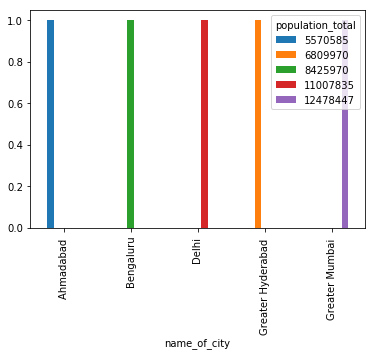

In [4]:
most_populated_cities=data.sort(['population_total'], ascending=[0] )[:5]
most_populated_cities=pd.crosstab(most_populated_cities.name_of_city,most_populated_cities.population_total)
most_populated_cities.plot(kind='bar')

*States with most cities in Top 500 cities*

['MADHYA PRADESH', 'ANDHRA PRADESH', 'MAHARASHTRA', 'WEST BENGAL', 'UTTAR PRADESH']
[32, 42, 43, 61, 63]


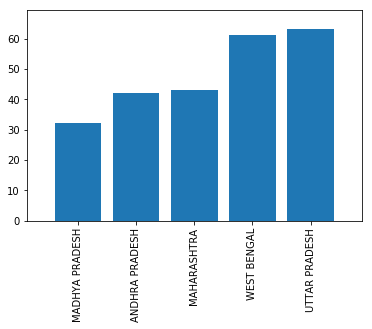

In [5]:
top_states=Counter(data['state_name'])
top_States=sorted(top_states.items(), key=lambda x: x[1])
top_States=DataFrame(top_States[-5:])
States=list(top_States[0])
print(States)
top_States=DataFrame({"States":top_States[0],"Number_of_cities":top_States[1]})
x=[1,2,3,4,5]
y=top_States['Number_of_cities']
y=list(y)
print(y)
plt.bar(x,y)
plt.xticks(x,States,rotation='vertical')
plt.margins(0.1)
plt.subplots_adjust(bottom=0.15)

*SEX Ratio comparison*

In [6]:
sex_ratio=data.sort(['sex_ratio'],ascending=[0])[:15]
print(sex_ratio['state_name'])

278            KERALA
275            KERALA
14             KERALA
461            KERALA
459            KERALA
220          MANIPUR 
358            KERALA
245    ANDHRA PRADESH
378        PUDUCHERRY
430         MEGHALAYA
488    ANDHRA PRADESH
333        TAMIL NADU
458        TAMIL NADU
290    ANDHRA PRADESH
483        TAMIL NADU
Name: state_name, dtype: object


/opt/conda/bin/ipython:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  #!/opt/conda/bin/python


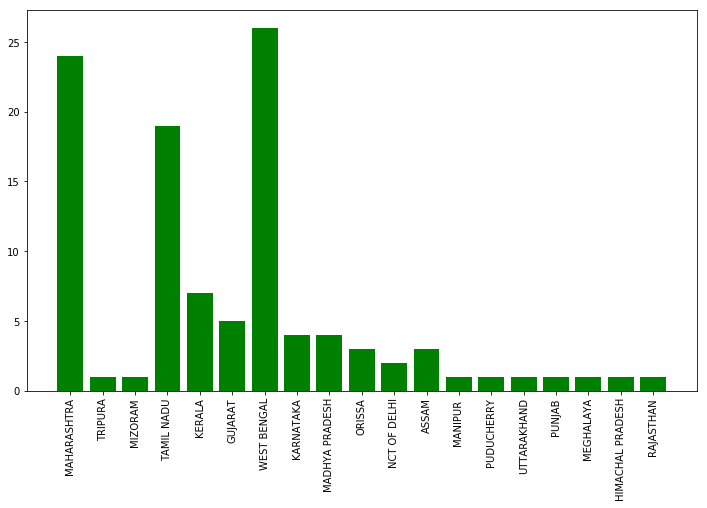

In [7]:
literacy_rate=data[data['effective_literacy_rate_total']>90]
literacy_rate_states=literacy_rate['state_name']
literacy_rate_states=Counter(literacy_rate_states)
plt.figure(figsize=(12,7))
plt.bar(range(len(literacy_rate_states)), literacy_rate_states.values(), align='center',color='g')
plt.xticks(range(len(literacy_rate_states)), literacy_rate_states.keys(),rotation='vertical')
plt.show()

**Graduates comparison**

/opt/conda/bin/ipython:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  #!/opt/conda/bin/python


([<matplotlib.axis.XTick at 0x7fa891d5f320>,
 <a list of 15 Text xticklabel objects>)

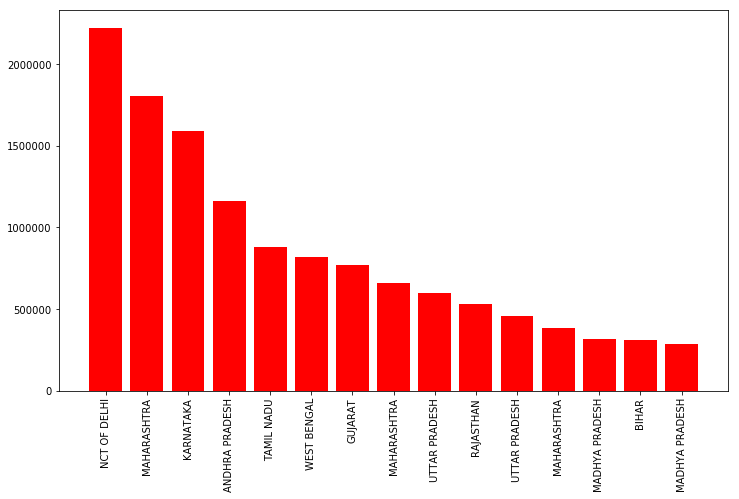

In [8]:
graduates=data.sort(['total_graduates'],ascending=[0])[:15]
plt.figure(figsize=(12,7))
plt.bar(range(len(graduates['total_graduates'])), graduates['total_graduates'], align='center',color='r')
graduates_states=list(graduates['state_name'])
plt.xticks(range(len(graduates_states)), graduates_states,rotation='vertical')

([<matplotlib.axis.XTick at 0x7fa891d046a0>,
 <a list of 15 Text xticklabel objects>)

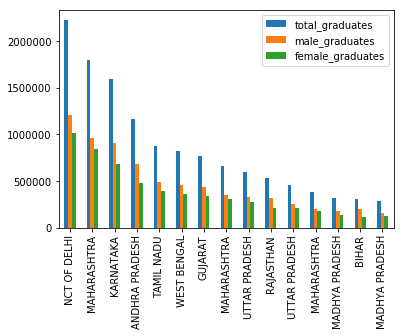

In [9]:
merged_graduates=graduates[['total_graduates','male_graduates','female_graduates']].copy()
plt.figure(figsize=(20,10))
merged_graduates.plot(kind='bar')
plt.xticks(range(len(graduates_states)), graduates_states,rotation='vertical')